In [1]:
import lib_data as data
import pickle as pk
import pandas as pd
import numpy as np
from numpy import *
import time
import matplotlib.pyplot as plt
from tqdm import *
from pylab import *
import pickle
import os
import julian
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
nasa_julian = 98
cnes_julian = 90

#### Regional data extraction

In [2]:
extract = False
if extract:
    data.region_ex('GulfStream',pres_max =10000,fe = 0.05)

# Temporal and Spatial Data Distribtion

## Gulf Stream 100 % data

In [2]:
# load the Gulf Stream region
ft_gs = pd.read_pickle("data/GS-all/feature_train_gs.pkl")

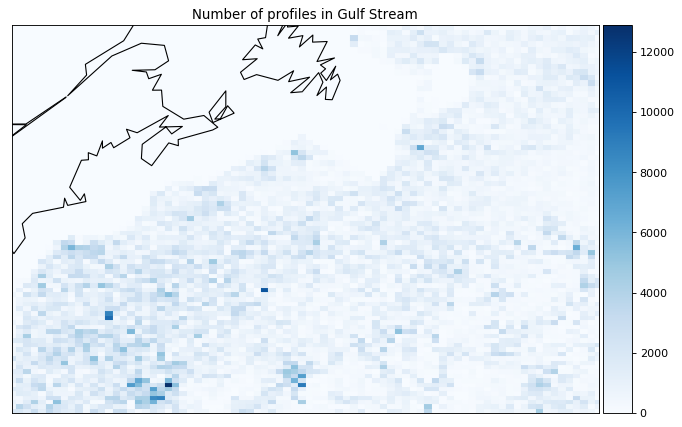

In [3]:
data.spatial_dist(ft_gs,80,80, "Gulf Stream",30,50,-75,-35)

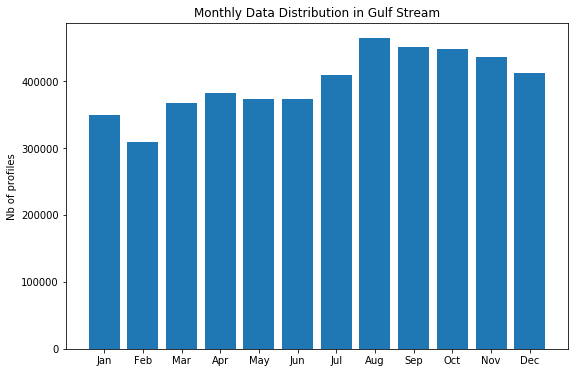

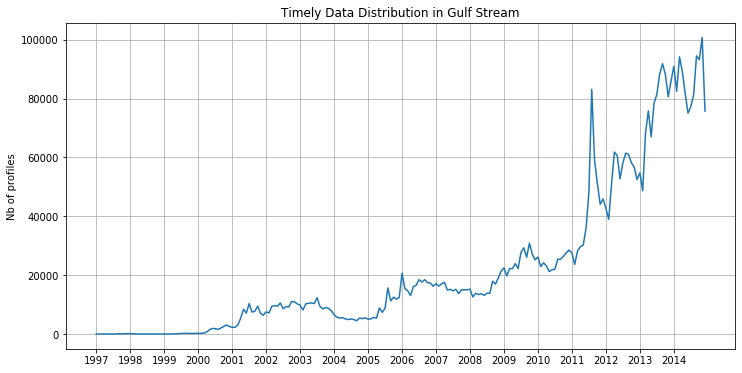

In [4]:
data.temporal_dist(ft_gs, "Gulf Stream")

## Kurioshio 100 % data

In [96]:
# load the Gulf Stream region
ft_ks = pd.read_pickle("data/KS-all/feature_train_ks.pkl")

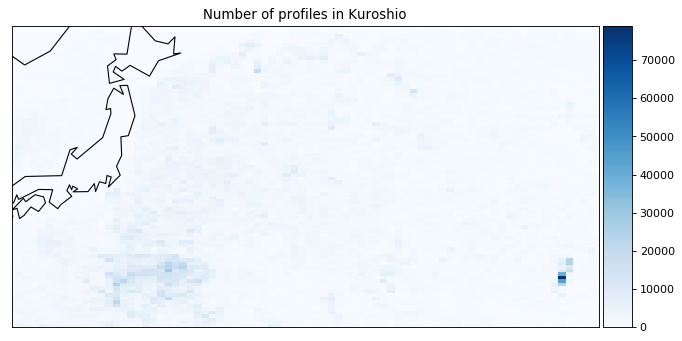

In [116]:
data.spatial_dist(ft_ks,80,80, "Kuroshio",25,45,132,180)

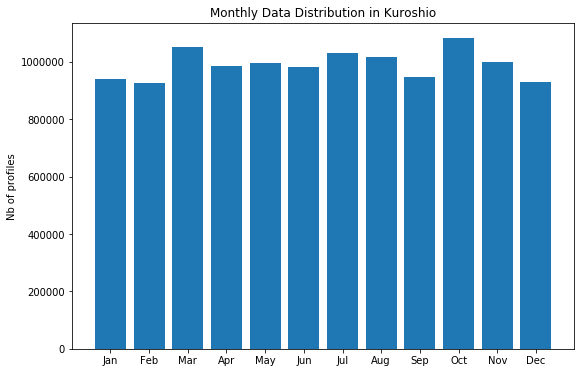

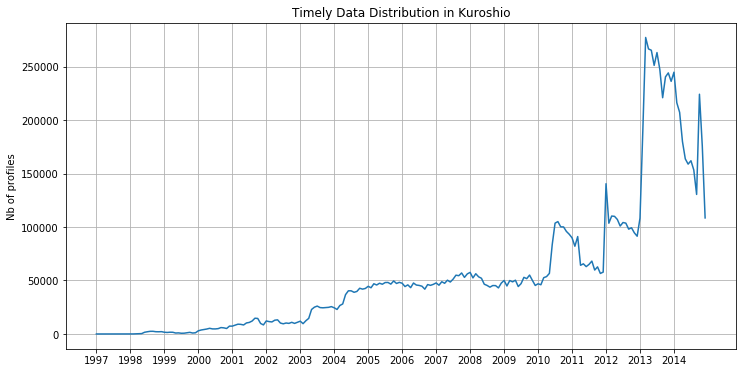

In [113]:
data.temporal_dist(ft_ks, "Kuroshio")

# Depth Data Distribution

In [37]:
profiles = pd.read_pickle('data/GS-all/feature_train_gs.pkl')[:,-1]
temps =  pd.read_pickle('data/GS-all/y_train_gs.pkl')[:,0]
pres =  pd.read_pickle('data/GS-all/x_train_gs.pkl')[:,-1]
lat =  pd.read_pickle('data/GS-all/feature_train_gs.pkl')[:,0]
lon =  pd.read_pickle('data/GS-all/feature_train_gs.pkl')[:,1]
juld = pd.read_pickle('data/GS-all/feature_train_gs.pkl')[:,2]

In [38]:
profile_indexes = np.unique(profiles)[np.random.randint(0, np.unique(profiles).shape[0],1)][0]
profile_indexes

4853.0

In [39]:
mask = np.where(profiles == profile_indexes)[0]
mask.shape

(630,)

No handles with labels found to put in legend.


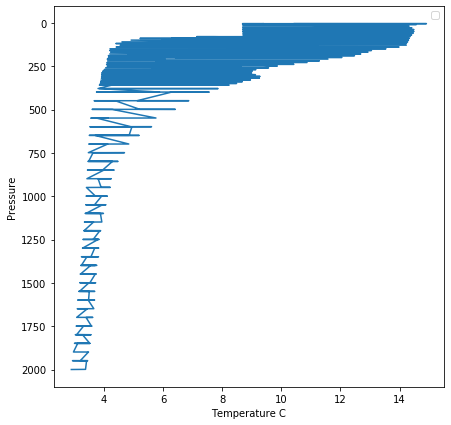

In [40]:
# extract infos
temp_ = temps[mask]
lat_ = lat[mask]
lon_ = lon[mask]
juld_ = juld[mask]
pres_ = pres[mask]


sorted_pres_index = np.argsort(pres_)
sorted_pres = pres_[sorted_pres_index]
sorted_lat = lat_[sorted_pres_index]
sorted_lon = lon_[sorted_pres_index]
sorted_juld = juld[sorted_pres_index]
soted_temp = temp_[sorted_pres_index]

plt.figure(figsize=(7,7))
plt.plot(soted_temp,sorted_pres);
plt.xlabel("Temperature C")
plt.ylabel("Pressure")
plt.legend();
plot_index = plot_index + 1
plt.gca().invert_yaxis()
plt.show()

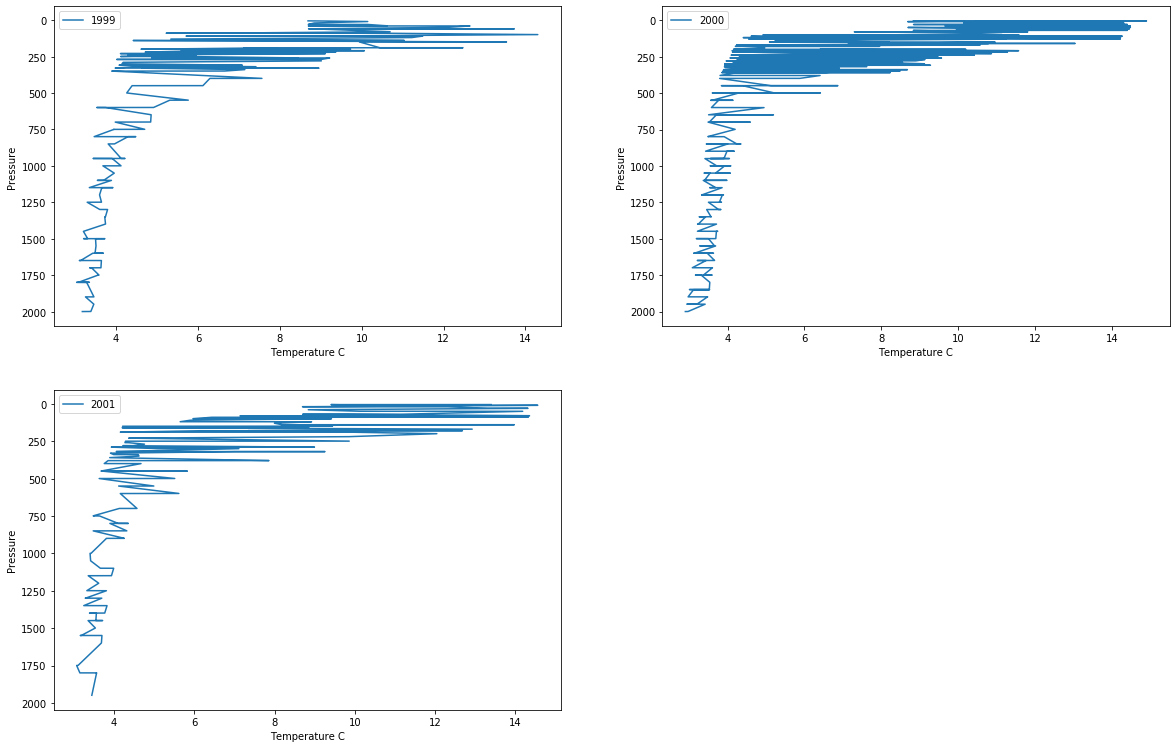

In [41]:
years_ = np.asarray([julian.from_jd(d, fmt='mjd').year for d in list(sorted_juld)])
year_ = np.unique(years_)

plot_index = 0
plt.figure(figsize=(20,20))
for y in list(year_):

    mask_year = np.where(years_ == y)
    temp_year_plot = soted_temp[mask_year]
    pres_year_plot = sorted_pres[mask_year]
    plt.subplot(321+plot_index);
    plt.plot(temp_year_plot,pres_year_plot,label = str(y+90));
    plt.xlabel("Temperature C");
    plt.ylabel("Pressure");
    plt.legend();
    plot_index = plot_index + 1
    plt.gca().invert_yaxis()

In [42]:
# for i,p in enumerate(list(profile_indexes)):
    
#     plt.figure(figsize=(12,8))
    
#     # extract infos
#     mask_plot = mask[i][0]
#     temp_plot = temps[mask_plot]
#     lat_plot = lat[mask_plot]
#     lon_plot = lon[mask_plot]
#     juld_plot = juld[mask_plot]
#     ax = plt.gca()
#     plt.title("Profile Distribution")
#     map = Basemap(projection='merc',llcrnrlat=30,urcrnrlat=50,llcrnrlon=-75,urcrnrlon=-35,resolution='c')
#     map.drawcoastlines()
#     x, y = map(lon_plot, lat_plot)
#     map.scatter(x, y, c = temp_plot, marker = 's', label =str(int(profile_indexes[0])))
#     plt.legend()
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)
#     plt.colorbar(cax=cax)
#     plt.show()

### Train - Test split

In [2]:
features = pd.read_pickle('data/KS-p_100-10/feature-KS-p_100-10.pkl')
X = pd.read_pickle('data/KS-p_100-10/x-KS-p_100-10.pkl')
Y = pd.read_pickle('data/KS-p_100-10/y-KS-p_100-10.pkl')

In [3]:
data.train_test_split(X,Y,features,0.3)